# BDA Final - ML for predicting heart diseases / attacks 

The goal of this mashine learning paper is to reveal hidden / non-obvious features contributing to heart diseases / attacks.

In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats

In [2]:
pd.set_option("display.max_columns", 330) #displaying all of the columns in CDC datasets

df_cdc = pd.read_csv('Datasets/BRFSS_2015.csv') #importing the CDC dataset
df_kaggle = pd.read_csv('Datasets/heart_disease_indicators(KaeggleImport).csv') #importing kaggles cleaned dataset

In [3]:
#compareing kaggles colums to the colunms of the original dataset by the CDC 

column_names_cdc = []
column_names_kaggle = []

for col in df_cdc:
    column_names_cdc.append(col)

print(column_names_cdc)
print('\n')

for col in df_kaggle:
    column_names_kaggle.append(col)

print(column_names_kaggle)

['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE', 'SEQNO', '_PSU', 'CTELENUM', 'PVTRESD1', 'COLGHOUS', 'STATERES', 'CELLFON3', 'LADULT', 'NUMADULT', 'NUMMEN', 'NUMWOMEN', 'CTELNUM1', 'CELLFON2', 'CADULT', 'PVTRESD2', 'CCLGHOUS', 'CSTATE', 'LANDLINE', 'HHADULT', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'POORHLTH', 'HLTHPLN1', 'PERSDOC2', 'MEDCOST', 'CHECKUP1', 'BPHIGH4', 'BPMEDS', 'BLOODCHO', 'CHOLCHK', 'TOLDHI2', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ASTHMA3', 'ASTHNOW', 'CHCSCNCR', 'CHCOCNCR', 'CHCCOPD1', 'HAVARTH3', 'ADDEPEV2', 'CHCKIDNY', 'DIABETE3', 'DIABAGE2', 'SEX', 'MARITAL', 'EDUCA', 'RENTHOM1', 'NUMHHOL2', 'NUMPHON2', 'CPDEMO1', 'VETERAN3', 'EMPLOY1', 'CHILDREN', 'INCOME2', 'INTERNET', 'WEIGHT2', 'HEIGHT3', 'PREGNANT', 'QLACTLM2', 'USEEQUIP', 'BLIND', 'DECIDE', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'SMOKE100', 'SMOKDAY2', 'STOPSMK2', 'LASTSMK2', 'USENOW3', 'ALCDAY5', 'AVEDRNK2', 'DRNK3GE5', 'MAXDRNKS', 'FRUITJU1', 'FRUIT1', 'FVBEANS', 'FVGREEN', 'FVORANG', 'VEGETAB1'

In [4]:
print('Shape of CDC dataset: {}'.format(df_cdc.shape)) #compareing shapes 
print('Shape of Kaggle dataset: {}'.format(df_kaggle.shape))

Shape of CDC dataset: (441456, 330)
Shape of Kaggle dataset: (253680, 22)


### Removing all the columns that contain more than 5% of NaN values and/or are irrelevant for our ML

In [5]:
def remove_columns(df_name):
    redundant_columns = ['FMONTH','IDATE','IMONTH','IDAY','IYEAR','DISPCODE','SEQNO','_PSU','CTELENUM',
                         'PVTRESD1','COLGHOUS','STATERES','CELLFON3','LADULT','NUMADULT','NUMMEN','NUMWOMEN',
                         'CTELNUM1','CELLFON2','CADULT','PVTRESD2','CCLGHOUS','CSTATE','LANDLINE','HHADULT',
                         'POORHLTH','BPMEDS','ASTHNOW','DIABAGE2','NUMHHOL2','NUMPHON2','CPDEMO1','PREGNANT',
                         'SMOKDAY2','STOPSMK2','LASTSMK2','AVEDRNK2','DRNK3GE5','MAXDRNKS','FRUITJU1','FRUIT1',
                         'FVBEANS','FVGREEN','FVORANG','VEGETAB1','EXERANY2','EXRACT11','EXEROFT1','EXERHMM1',
                         'EXRACT21','EXEROFT2','EXERHMM2','STRENGTH','LMTJOIN3','ARTHDIS2','ARTHSOCL','JOINPAIN',
                         'SEATBELT','FLUSHOT6','FLSHTMY2','IMFVPLAC','PNEUVAC3','HIVTST6','HIVTSTD3','WHRTST10',
                         'PDIABTST','PREDIAB1','INSULIN','BLDSUGAR','FEETCHK2','DOCTDIAB','CHKHEMO3','FEETCHK',
                         'EYEEXAM','DIABEYE','DIABEDU','PAINACT2','QLMENTL2','QLSTRES2','QLHLTH2','CAREGIV1',
                         'CRGVREL1','CRGVLNG1','CRGVHRS1','CRGVPRB1','CRGVPERS','CRGVHOUS','CRGVMST2','CRGVEXPT',
                         'VIDFCLT2','VIREDIF3','VIREDIF3','VINOCRE2','VIEYEXM2','VIINSUR2','VICTRCT4','VIGLUMA2',
                         'VIMACDG2','CIMEMLOS','CDHOUSE','CDASSIST','CDHELP','CDSOCIAL','CDDISCUS','WTCHSALT',
                         'LONGWTCH','DRADVISE','ASTHMAGE','ASATTACK','ASERVIST','ASDRVIST','ASRCHKUP','ASACTLIM',
                         'ASRCHKUP','ASACTLIM','ASYMPTOM','ASNOSLEP','ASTHMED3','ASINHALR','HAREHAB1','STREHAB1',
                         'CVDASPRN','ASPUNSAF','RLIVPAIN','RDUCHART','RDUCSTRK','ARTTODAY','ARTHWGT','ARTHEXER',
                         'ARTHEDU','TETANUS', 'HPVADVC2','HPVADSHT','SHINGLE2','HADMAM','HOWLONG','HADPAP2',
                         'LASTPAP2','HPVTEST','HPLSTTST','HADHYST2','PROFEXAM','LENGEXAM','BLDSTOOL','LSTBLDS3',
                         'HADSIGM3','HADSGCO1','LASTSIG3','PCPSAAD2','PCPSADI1','PCPSARE1','PSATEST1','PSATIME',
                         'PCPSARS1','PCDMDECN','SCNTMNY1','SCNTMEL1','SCNTPAID','SCNTWRK1','SCNTLPAD','SCNTLWK1',
                         'RCSGENDR','RCSRLTN2','CASTHDX2','CASTHNO2','EMTSUPRT','LSATISFY','ADPLEASR','ADDOWN',
                         'ADSLEEP','ADENERGY','ADEAT1','ADFAIL','ADTHINK','ADMOVE','MISTMNT','ADANXEV','EXACTOT1',
                         'EXACTOT2','_STSTR','_STRWT','_RAWRAKE','_WT2RAKE','_CRACE1','_CPRACE','_CLLCPWT','_DUALCOR',
                         '_CLLCPWT','PADUR2_','METVL11_','METVL21_','ACTIN11_','ACTIN21_','PADUR1_','PAFREQ1_',
                         'PAFREQ2_','_MINAC11','_MINAC21','PAMIN11_','PAMIN21_','PA1MIN_','PAVIG11_','PAVIG21_',
                         'PA1VIGM_', 'VIPRFVS2', '_FLSHOT6', '_PNEUMO2', 'PCPSADE1', '_LLCPWT', 'SXORIENT', 
                         'TRNSGNDR', '_CHISPNC'] 
    df_name = df_name.drop(columns = redundant_columns, axis = 1, inplace = True) 
    return df_name

remove_columns(df_cdc)

In [6]:
print(df_cdc.isnull().sum().to_string(max_rows=None)) #looking at the NaN values per column

_STATE           0
GENHLTH          2
PHYSHLTH         1
MENTHLTH         0
HLTHPLN1         0
PERSDOC2         0
MEDCOST          1
CHECKUP1         1
BPHIGH4          1
BLOODCHO         0
CHOLCHK      59154
TOLDHI2      59154
CVDINFR4         0
CVDCRHD4         1
CVDSTRK3         0
ASTHMA3          0
CHCSCNCR         1
CHCOCNCR         0
CHCCOPD1         0
HAVARTH3         1
ADDEPEV2         0
CHCKIDNY         0
DIABETE3         7
SEX              0
MARITAL          0
EDUCA            0
RENTHOM1         0
VETERAN3         6
EMPLOY1          0
CHILDREN         5
INCOME2       3301
INTERNET      4310
WEIGHT2       5315
HEIGHT3       5911
QLACTLM2      9338
USEEQUIP     10430
BLIND        11154
DECIDE       11740
DIFFWALK     12334
DIFFDRES     12728
DIFFALON     13326
SMOKE100     14255
USENOW3      14890
ALCDAY5      15931
QSTVER           0
QSTLANG         22
MSCODE      190877
_DUALUSE         0
_RFHLTH          0
_HCVU651         0
_RFHYPE5         0
_CHOLCHK         0
_RFCHOL     

In [7]:
df_cdc['MSCODE'].fillna(7, inplace=True) #MSCODE stood out with 190k NaN values, but the CodeBook tells us that in 
                                           #--> this case NaN stands for something rather than no answer 

In [8]:
df_cdc.dropna(inplace=True)

In [9]:
print(df_cdc.shape)
df_cdc

(297751, 122)


,_STATE,GENHLTH,PHYSHLTH,MENTHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BLOODCHO,CHOLCHK,TOLDHI2,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,SEX,MARITAL,EDUCA,RENTHOM1,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,QLACTLM2,USEEQUIP,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,USENOW3,ALCDAY5,QSTVER,QSTLANG,MSCODE,_DUALUSE,_RFHLTH,_HCVU651,_RFHYPE5,_CHOLCHK,_RFCHOL,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA1_,FRUTDA1_,BEANDAY_,GRENDAY_,ORNGDAY_,VEGEDA1_,_MISFRTN,_MISVEGN,_FRTRESP,_VEGRESP,_FRUTSUM,_VEGESUM,_FRTLT1,_VEGLT1,_FRT16,_VEG23,_FRUITEX,_VEGETEX,_TOTINDA,MAXVO2_,FC60_,STRFREQ_,PAMISS1_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_AIDTST3
0,1.0,5.0,15.0,18.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,3.0,2.0,1.0,4.0,1.0,2.0,8.0,88.0,3.0,2.0,280.0,510.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,3.0,888.0,10.0,1.0,3.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,9.0,1.0,63.0,5.0,70.0,178.0,12701.0,4018.0,4.0,2.0,1.0,2.0,2.0,3.0,1.0,2.0,5.397605e-79,1.0,5.397605e-79,1.0,1.700000e+01,3.300000e+01,6.700000e+01,3.300000e+01,17.0,100.0,5.397605e-79,5.397605e-79,1.0,1.0,50.0,217.0,2.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79,2.0,2469.0,423.0,5.397605e-79,5.397605e-79,4.0,2.0,3.0,3.0,2.0,2.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,3.0,88.0,88.0,2.0,1.0,1.0,4.0,3.0,1.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,6.0,1.0,2.0,3.0,88.0,1.0,1.0,165.0,508.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,3.0,888.0,10.0,1.0,5.0,9.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,3.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,7.0,1.0,52.0,4.0,68.0,173.0,7484.0,2509.0,3.0,2.0,1.0,4.0,1.0,1.0,2.0,2.0,5.397605e-79,1.0,5.397605e-79,1.0,7.000000e+00,1.700000e+01,7.000000e+00,2.900000e+01,29.0,13.0,5.397605e-79,5.397605e-79,1.0,1.0,24.0,78.0,2.0,2.0,1.0,1.0,5.397605e-79,5.397605e-79,1.0,2876.0,493.0,5.397605e-79,5.397605e-79,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,2.0,2.0
3,1.0,5.0,30.0,30.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,3.0,2.0,1.0,4.0,1.0,2.0,8.0,1.0,8.0,2.0,180.0,507.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,3.0,888.0,10.0,1.0,3.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,9.0,1.0,63.0,5.0,67.0,170.0,8165.0,2819.0,3.0,2.0,2.0,2.0,5.0,4.0,1.0,2.0,5.397605e-79,1.0,5.397605e-79,1.0,5.397605e-79,1.000000e+02,5.397605e-79,3.000000e+00,3.0,14.0,5.397605e-79,5.397605e-79,1.0,1.0,100.0,20.0,1.0,2.0,1.0,1.0,5.397605e-79,5.397605e-79,2.0,2469.0,423.0,5.397605e-79,5.397605e-79,4.0,2.0,3.0,3.0,2.0,2.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,9.0
5,1.0,2.0,88.0,88.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,3.0,2.0,3.0,3.0,1.0,2.0,2.0,88.0,6.0,2.0,145.0,502.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,888.0,10.0,1.0,5.0,9.0,1.0,9.0,2.0,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,11.0,2.0,73.0,6.0,62.0,157.0,6577.0,2652.0,3.0,2.0,1.0,1.0,4.0,4.0,1.0,2.0,5.397605e-79,1.0,5.397605e-79,1.0,1.000000e+02,1.000000e+02,2.000000e+02,1.000000e+02,200.0,100.0,5.397605e-79,5.397605e-79,1.0,1.0,200.0,600.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79,1.0,2099.0,360.0,5.397605e-79,5.397605e-79,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,3.0,1.0,1.0,2.0
6,1.0,2.0,88.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,3.0,5.0,1.0,2.0,7.0,88.0,4.0,2.0,148.0,506.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,203.0,10.0,1.0,1.0,9.0,1.0,9.0,2.0,1.0,2.0,2.0,1.0,1.0,3.0,2.0,1.0,7.0,2.0,7.0,2.0,4.0,5.0,11.0,2.0,70.0,6.0,66.0,168.0,6713.0,2389.0,2.0,1.0,1.0,3.0,2.0,4.0,1.0,1.0,1.000000e+01,1.0,7.000000e+01,1.0,1.000000e+02,2.900000e+01,7.000000e+00,2.900000e+01,7.0,71.0,5.397605e-79,5.3976

In [10]:
df_cdc.to_csv('NanCleanFinal.csv', sep=",", index=False) #for simplicity we'll safe df_cdc in a seperate file

## Working with the data

In [11]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats

In [12]:
pd.set_option("display.max_columns", 125)
df = pd.read_csv('Datasets/NaNCleanFinal.csv')

## Visualizations to better understand the data we are dealing with

### Age distribution of the particapants in the survey

In [13]:
# Define a dictionary to map old values to new values
age_map = {1:'18-24', 2:'25-29', 3:'30-34', 4:'35-39', 5:'40-44', 6:'45-49',
           7:'50-54', 8:'55-59', 9:'60-64', 10:'65-69', 11:'70-74', 12:'75-79',
           13:'80+', 14:'Not known'}

# Use the map method to replace the values in the '_AGEG5YR' column
df['_AGEG5YR'] = df['_AGEG5YR'].map(age_map)

In [14]:
df['_AGEG5YR'].value_counts()

60-64        38331
65-69        38282
55-59        34833
50-54        29270
70-74        29076
80+          24074
45-49        21635
75-79        20613
40-44        17451
35-39        14969
30-34        12019
25-29         8388
18-24         7366
Not known     1444
Name: _AGEG5YR, dtype: int64

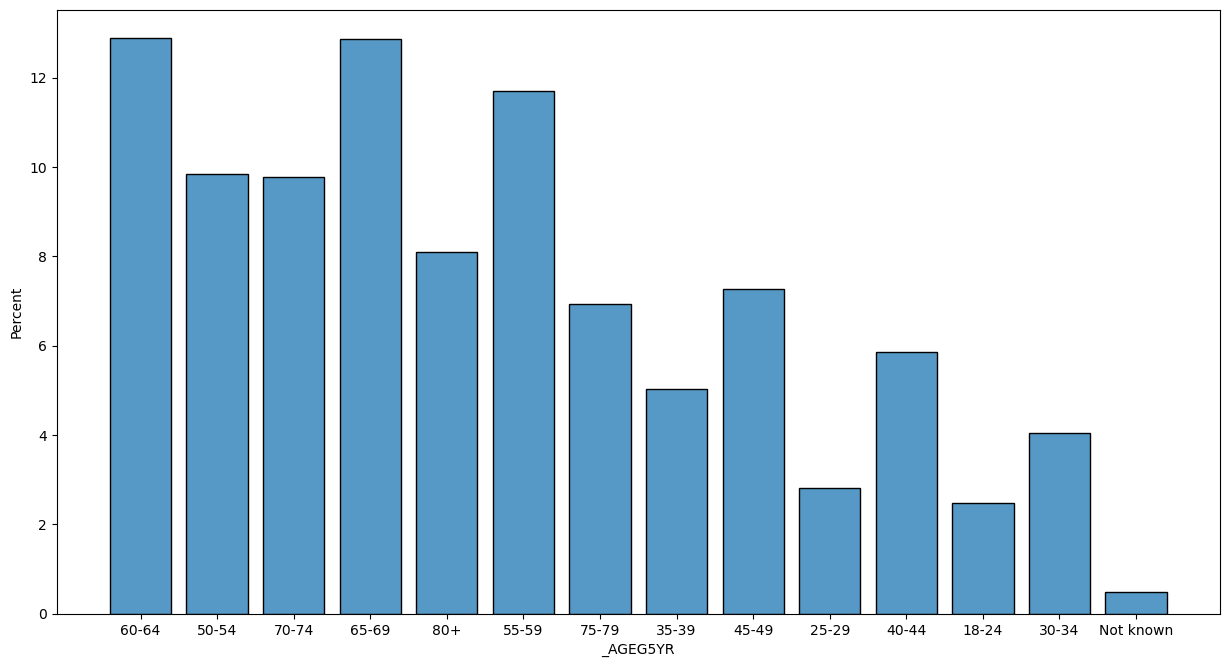

In [15]:
fig, ax = plt.subplots(figsize=(15, 8), dpi=100) #creating a figur for the histogram

# plot to the existing fig, by using ax=ax
p = sns.histplot(df._AGEG5YR, stat='percent', discrete=True, shrink=.8,ax=ax)

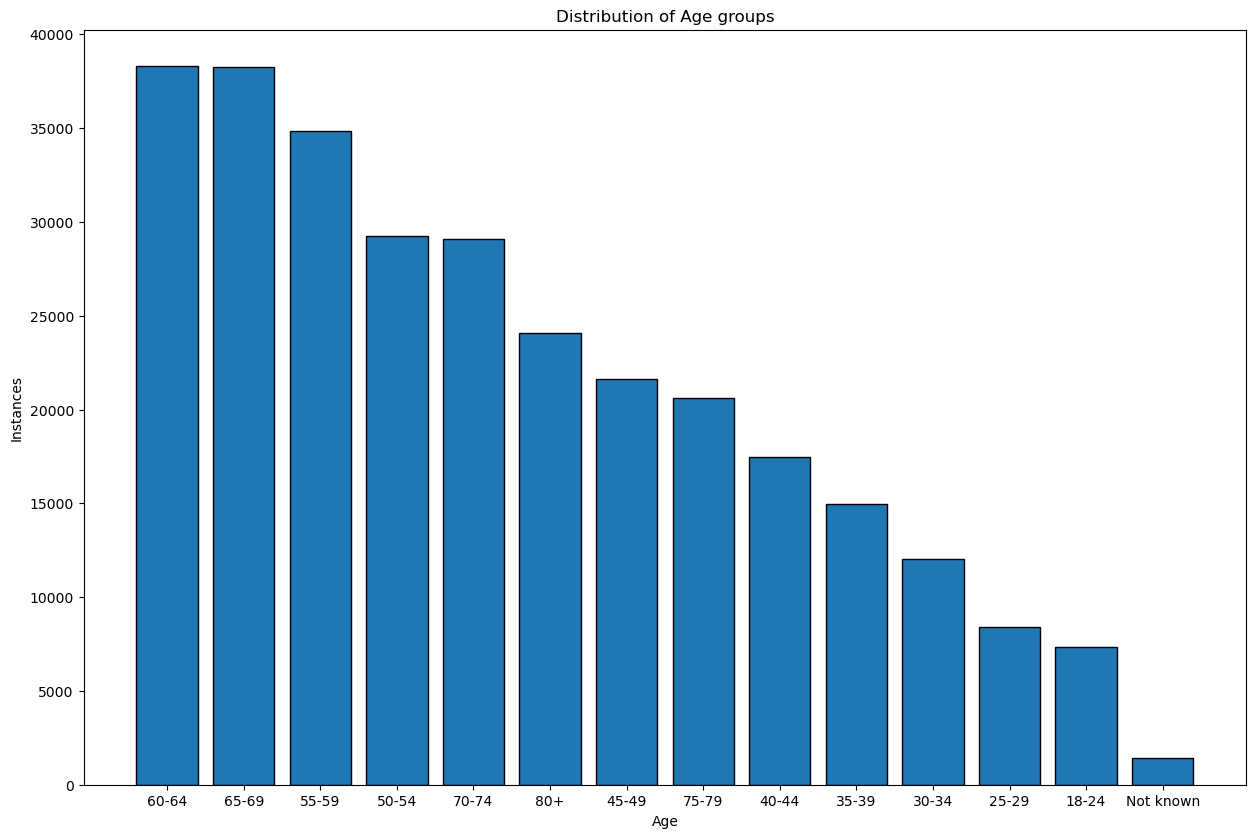

In [16]:
height = df.value_counts(df['_AGEG5YR']) #counting instances of each range of ages
bars = ('60-64','65-69','55-59','50-54','70-74','80+','45-49','75-79',
        '40-44','35-39','30-34','25-29','18-24','Not known') #labelling the bars
x_pos = np.arange(len(bars))
 
fig, ax = plt.subplots(figsize=(15, 10), dpi=100)
    
plt.bar(x_pos, height, width=.8, color = ('#1f77b4'), edgecolor = ('#000000')) #plotting and selecting colour

plt.title('Distribution of Age groups')
plt.xlabel('Age')
plt.ylabel('Instances')
 
plt.xticks(x_pos, bars)  #Create names on the x axis
 
plt.show()

### Race distribution of the participants of the survey 

In [18]:
# Define a dictionary to map old values to new values
race_map = {1:'White', 2:'Black', 3:'Other race', 4:'Multiracial', 5:'Hispanic', 9:"Don't know/Refused"}

# Use the map method to replace the values in the '_RACEGR3' column
df['_RACEGR3'] = df['_RACEGR3'].map(race_map)


In [19]:
df['_RACEGR3'].value_counts()

White          239769
Black           21456
Hispanic        19666
Other race      11567
Multiracial      5293
Name: _RACEGR3, dtype: int64

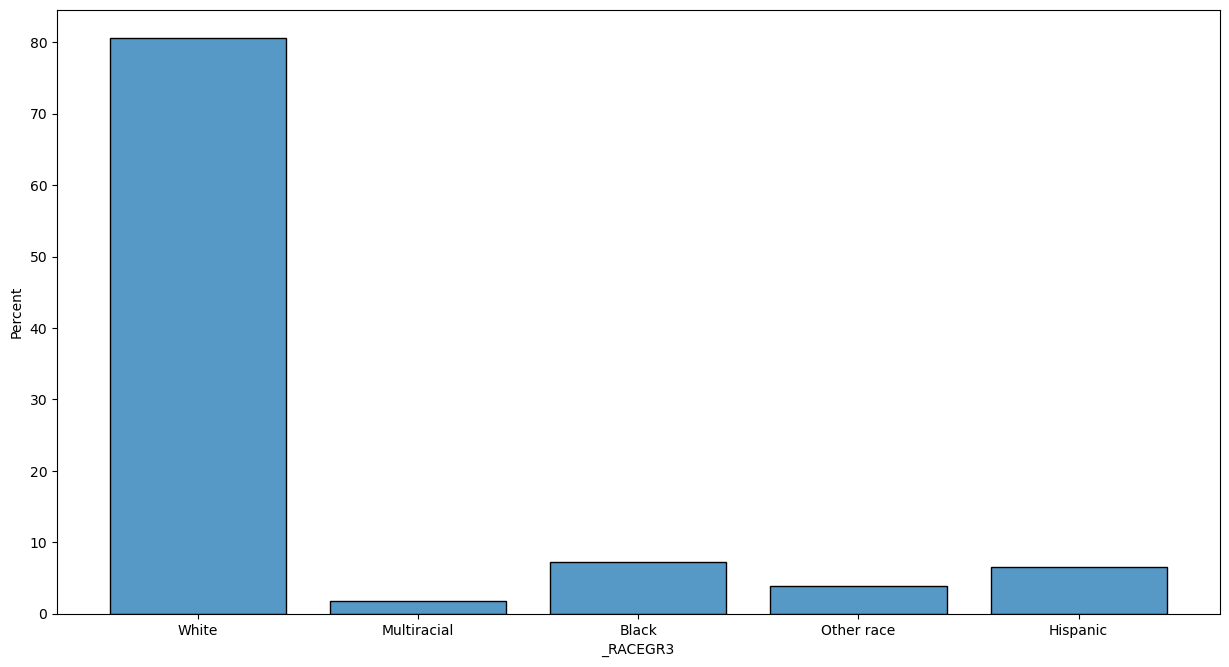

In [20]:
fig, ax = plt.subplots(figsize=(15, 8), dpi=100) #creating a figur for the histogram

# plot to the existing fig, by using ax=ax
p = sns.histplot(df._RACEGR3, stat='percent', discrete=True, shrink=.8,ax=ax)

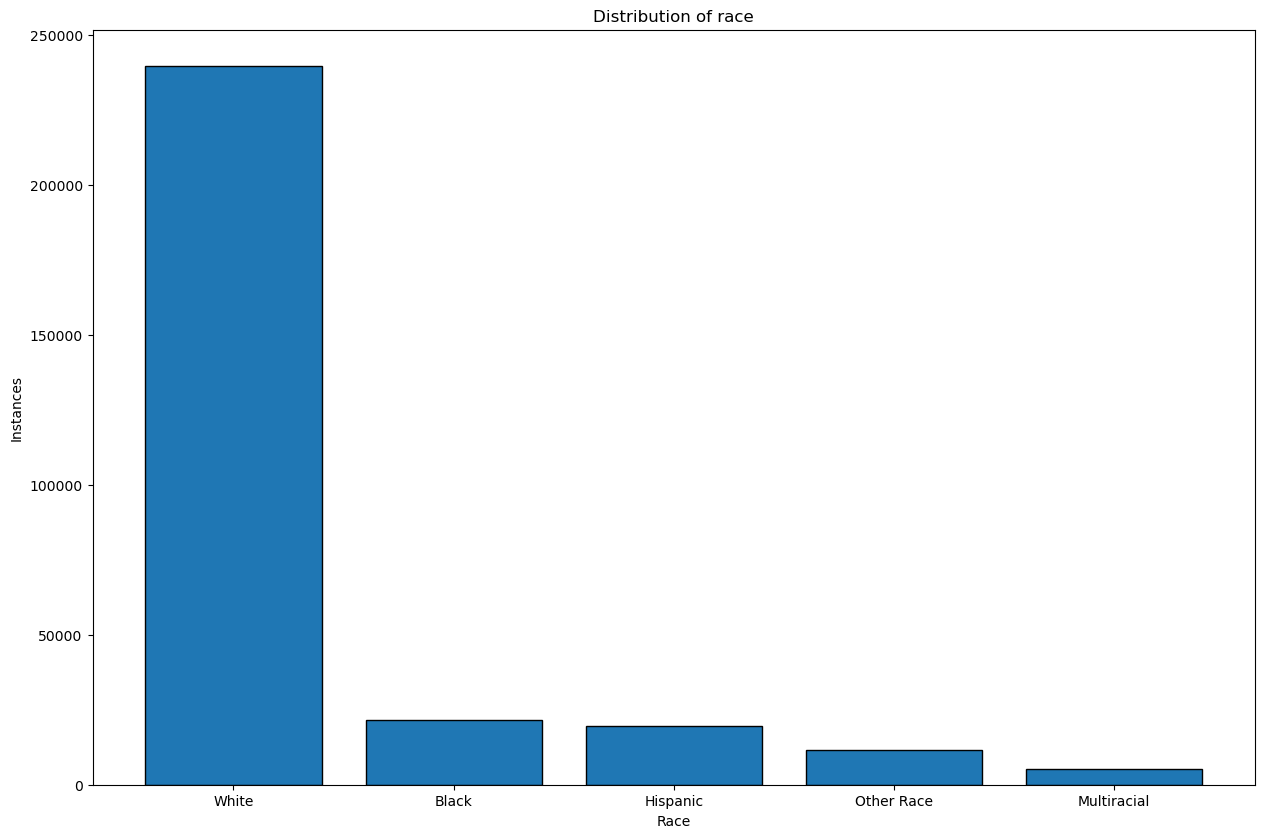

In [21]:
height = df.value_counts(df['_RACEGR3']) #counting instances of each race
bars = ('White','Black','Hispanic','Other Race','Multiracial') #labelling the bars
x_pos = np.arange(len(bars))
 
fig, ax = plt.subplots(figsize=(15, 10), dpi=100)
    
plt.bar(x_pos, height, width=.8, color = ('#1f77b4'), edgecolor = ('#000000')) #plotting and selecting colour

plt.title('Distribution of race')
plt.xlabel('Race')
plt.ylabel('Instances')
 
plt.xticks(x_pos, bars)  #Create names on the x axis
 
plt.show()

### Creating a sub-dataset for the visualization of percentage of heart attacks/diseases per state

In [22]:
df_map = df[['_STATE', '_MICHD']] #creating the subset
df_map['_MICHD'] = df_map['_MICHD'].replace({2: 0}) #bringing our target value to a binary scale of '0' and '1'
df_map._MICHD.unique()

/var/folders/4x/5_y4_03j3b5bsz_s2sq74dcr0000gn/T/ipykernel_71196/684435484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_map['_MICHD'] = df_map['_MICHD'].replace({2: 0}) #bringing our target value to a binary scale of '0' and '1'


array([0., 1.])

In [23]:
df_map_usa = df_map.groupby(['_STATE']).sum() #indexing by state
df_map_usa['Population'] =  df_map['_STATE'].value_counts() #adding the survey particiapants per state as population
df_map_usa['Percentage'] = df_map_usa['_MICHD'] / df_map_usa['Population'] #percentage heart attack per population
df_map_usa['Percentage'] = df_map_usa['Percentage'] * 100 
df_map_usa['Percentage'] = df_map_usa['Percentage'].round(2) #getting real percentages 

In [24]:
# Define a dictionary to map state codes to state names
state_map = {1: 'Alabama', 2: 'Alaska', 4: 'Arizona', 5: 'Arkansas', 6: 'California',
             8: 'Colorado', 9: 'Connecticut', 10: 'Delaware', 11: 'District of Columbia',
             12: 'Florida', 13: 'Georgia', 15: 'Hawaii', 16: 'Idaho', 17: 'Illinois',
             18: 'Indiana', 19: 'Iowa', 20: 'Kansas', 21: 'Kentucky', 22: 'Louisiana',
             23: 'Maine', 24: 'Maryland', 25: 'Massachusetts', 26: 'Michigan',
             27: 'Minnesota', 28: 'Mississippi', 29: 'Missouri', 30: 'Montana',
             31: 'Nebraska', 32: 'Nevada', 33: 'New Hampshire', 34: 'New Jersey',
             35: 'New Mexico', 36: 'New York', 37: 'North Carolina', 38: 'North Dakota',
             39: 'Ohio', 40: 'Oklahoma', 41: 'Oregon', 42: 'Pennsylvania',
             44: 'Rhode Island', 45: 'South Carolina', 46: 'South Dakota', 47: 'Tennessee',
             48: 'Texas', 49: 'Utah', 50: 'Vermont', 51: 'Virginia', 53: 'Washington',
             54: 'West Virginia', 55: 'Wisconsin', 56: 'Wyoming', 66:'Guam', 72:'Puerto Rico'}

# Reset the index of the dataframe to make '_STATE' a regular column
df_map_usa = df_map_usa.reset_index()

# Use the map method to replace the values in the '_STATE' column
df_map_usa['_STATE'] = df_map_usa['_STATE'].map(state_map)
df_map_usa.head()

,_STATE,_MICHD,Population,Percentage
0,Alabama,667.0,5347,12.47
1,Alaska,164.0,2421,6.77
2,Arizona,535.0,5217,10.25
3,Arkansas,509.0,3448,14.76
4,California,545.0,7925,6.88


In [25]:
df_map_usa.to_csv('MapUSAFinal.csv', sep=",", index=False) #exporting the file to import it to Tableau

### Correlation matrix (General overview of potential correlations)

In [ ]:
#bennet's code

### Per-class feature histograms 

Plotting the distribution of all features in their respective class (heart attack/disease: yes/no)

In [26]:
# Devide target variable into their respective classes
yes_data = df[df['_MICHD'] == 1]
no_data = df[df['_MICHD'] == 2]

features = [feature for feature in df.columns if feature != '_MICHD']

# Calculate the number of rows and columns for subplots
n_cols = 3
n_rows = math.ceil(len(features) / n_cols)

# Create a single figure with subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 5))
fig.subplots_adjust(hspace=0.5)

# Iterate through features and axes to create subplots
for feature, ax in zip(features, axes.flatten()):
    sns.histplot(yes_data[feature], color='#1f77b4', label='yes', alpha=0.5, stat='density', ax=ax)
    sns.histplot(no_data[feature], color='#ff7f0e', label='no', alpha=0.5, stat='density', ax=ax)
    ax.legend(title='Heart Disease')
    ax.set_title(f'Distribution of {feature} by heart disease')
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')
    
# Save the figure to disk and close it to free up memory
fig.savefig('Per-classHistALL.png', dpi=300, bbox_inches='tight')
plt.close(fig)

After carefully inspecting the different per-class histogramns for all 121 features, we have selected a couple interesting to be displayed in greater detail.
Therefore we need to change some of the scales of the features and remove some of the outliers.

In [27]:
new_features = df[['WTKG3','_BMI5','_AGEG5YR','_VEGESUM','MAXVO2_','_FRUTSUM','_MICHD']]

In [28]:
# Changing the scale of WTKG3
df['WTKG3'] = df['WTKG3'] / 100

# Changing the scale of _BMI5
df['_BMI5'] = df['_BMI5'] / 100

# Changing the scale of _VEGESUM
df['_VEGESUM'] = df['_VEGESUM'] / 100

# Changing the scale of MAXVO2_
df['MAXVO2_'] = df['MAXVO2_'] / 100
df['MAXVO2_'] = df['MAXVO2_'].replace({999:0})

# Changing the scale of _FRUTSUM
df['_FRUTSUM'] = df['_FRUTSUM'] / 100

In [29]:
df['_BMI5'] = df['_BMI5'][(np.abs(stats.zscore(df['_BMI5'])) < 3)] #Removing values outside 3 stds (99% incl)
df['_VEGESUM'] = df['_VEGESUM'][(np.abs(stats.zscore(df['_VEGESUM'])) < 3)] #Removing values outside 3 stds (99% incl)
df['_FRUTSUM'] = df['_FRUTSUM'][(np.abs(stats.zscore(df['_FRUTSUM'])) < 3)] #Removing values outside 3 stds (99% incl)
df['WTKG3'] = df['WTKG3'][(np.abs(stats.zscore(df['WTKG3'])) < 3)] #Removing values outside 3 stds (99% incl)

In [30]:
#redefining the features  
features = [feature for feature in new_features if feature != '_MICHD']

# Calculate the number of rows and columns for subplots
n_cols = 3
n_rows = math.ceil(len(features) / n_cols)

# Create a single figure with subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 5))
fig.subplots_adjust(hspace=0.5)

# Iterate through features and axes to create subplots
for feature, ax in zip(features, axes.flatten()):
    sns.histplot(yes_data[feature], color='#1f77b4', label='yes', alpha=0.5, stat='density', ax=ax)
    sns.histplot(no_data[feature], color='#ff7f0e', label='no', alpha=0.5, stat='density', ax=ax)
    ax.set_title(f'Distribution of {feature} by heart disease')
    ax.set_xlabel(feature)
    
# Create a custom legend for the entire figure
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#1f77b4', alpha=0.5, label='Yes'),
                   Patch(facecolor='#ff7f0e', alpha=0.5, label='No')]

# Adjust the location and font size of the legend
fig.legend(handles=legend_elements, title='Heart Disease', fontsize='large')

# Save the figure to disk and close it to free up memory
fig.savefig('Per-classHist.png', dpi=300, bbox_inches='tight')
plt.close(fig)

In [31]:
# Reiterate through features and axes to create subplots but now for instances instead of density
for feature, ax in zip(features, axes.flatten()):
    sns.histplot(yes_data[feature], color='#1f77b4', label='yes', alpha=0.5, ax=ax)
    sns.histplot(no_data[feature], color='#ff7f0e', label='no', alpha=0.5, ax=ax)
    ax.set_title(f'Distribution of {feature} by heart disease')
    ax.set_xlabel(feature)
    ax.set_ylabel('Instances')
    
    
# Create a custom legend for the entire figure
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#1f77b4', alpha=0.5, label='Yes'),
                   Patch(facecolor='#ff7f0e', alpha=0.5, label='No')]

# Adjust the location and font size of the legend
fig.legend(handles=legend_elements, title='Heart Disease', fontsize='large')
    
# Save the figure to disk and close it to free up memory
fig.savefig('Per-classHist(Instances).png', dpi=300, bbox_inches='tight')
plt.close(fig)

## Apendix:


### Color palette

In [32]:
#['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
sns.color_palette() # color palette 

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [33]:
print(sns.color_palette().as_hex())

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
